# Разведочный анализ данных (Exploratory Data Analysis)

На семинаре продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [23]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

**Задание 1.** Выведите на экран размеры таблицы

In [24]:
#your code here
Data.shape

(891, 12)

# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [25]:
#your code here
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [27]:
#your code here
Data['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [28]:
#your code here
Data = Data[Data['Sex'] != 'unknown']
Data.shape

(886, 12)

**Задание ***. Подумайте, можно ли как-то узнать пол пассажиров, которые отнесены к категории unknown?

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [29]:
#your code here
Data['Sex'] = Data['Sex'].map({'male': 1, 'female': 0})

#или

#Data['Sex'] = Data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

Посмотрим, как влияет пол на выживаемость.

In [30]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,S


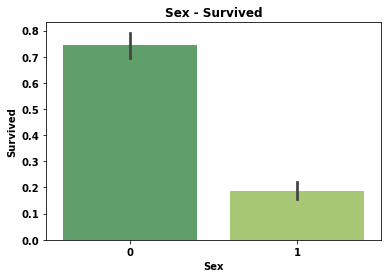

In [31]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

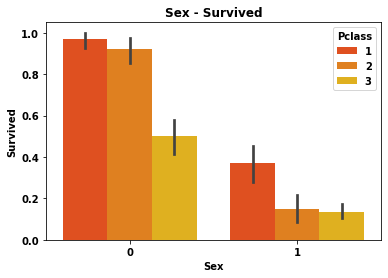

In [32]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

c:\programdata\miniconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


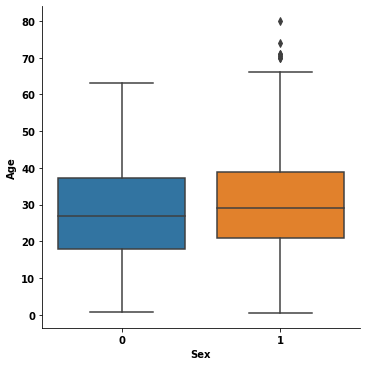

In [33]:
sns.factorplot(x="Sex", y="Age", data=Data, kind="box") # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

c:\programdata\miniconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


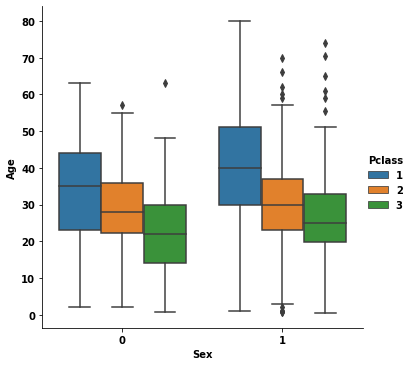

In [34]:
sns.factorplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [35]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

**Задание 6.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [36]:
Data.dropna(subset=['Embarked'], inplace=True)
Data.shape

(884, 12)

**Задание 7.** Закодируйте столбец Embarked с помощью OneHot-кодирования (pd.get_dummies). 

In [37]:
Data = pd.get_dummies(Data, columns=['Embarked'], drop_first=True)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,1


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [39]:
#your code here

Заполним пропуски медианным значением Age.

In [38]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


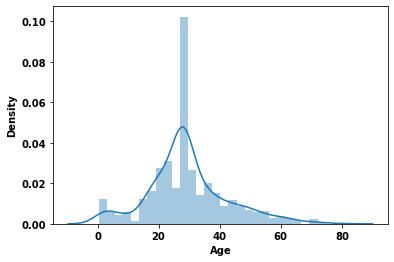

In [39]:
sns.distplot(Data['Age'], kde=True)
plt.show()

Посмотрим на распределение Pclass по возрастам.

c:\programdata\miniconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


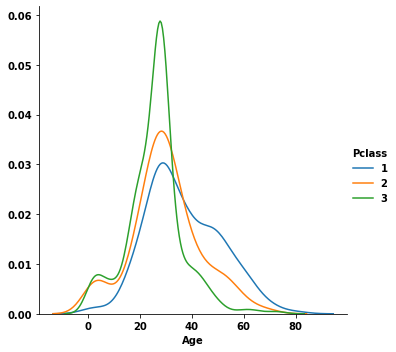

In [40]:
import seaborn as sns

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [41]:
#your code here
Data['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
34.6542     1
61.1750     1
26.3875     1
25.5875     1
8.3000      1
Name: Fare, Length: 246, dtype: int64

**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [42]:
Data['Pclass'].value_counts()

3    487
1    214
2    183
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

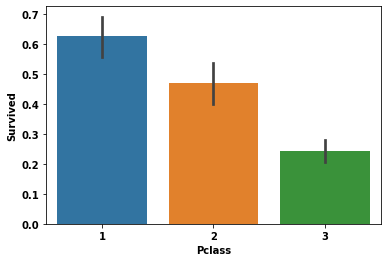

In [43]:
#your code here
sns.barplot(x='Pclass', y='Survived', data=Data)

**Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)**

Есть ли в SibSp пропущенные значения?

In [44]:
Data['SibSp'].value_counts()

0    603
1    207
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

**Обработаем признак 'Parch' (число родителей/детей)**

Есть ли в Parch пропущенные значения?

In [45]:
Data['Parch'].value_counts()

0    673
1    118
2     79
3      5
4      4
5      4
6      1
Name: Parch, dtype: int64

**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [46]:
#your code here
Data.drop('PassengerId',axis=1,inplace=True)

In [47]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,0,0
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,0,1
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,1


# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [48]:
#your code here

NumericData = Data._get_numeric_data()
NumericData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


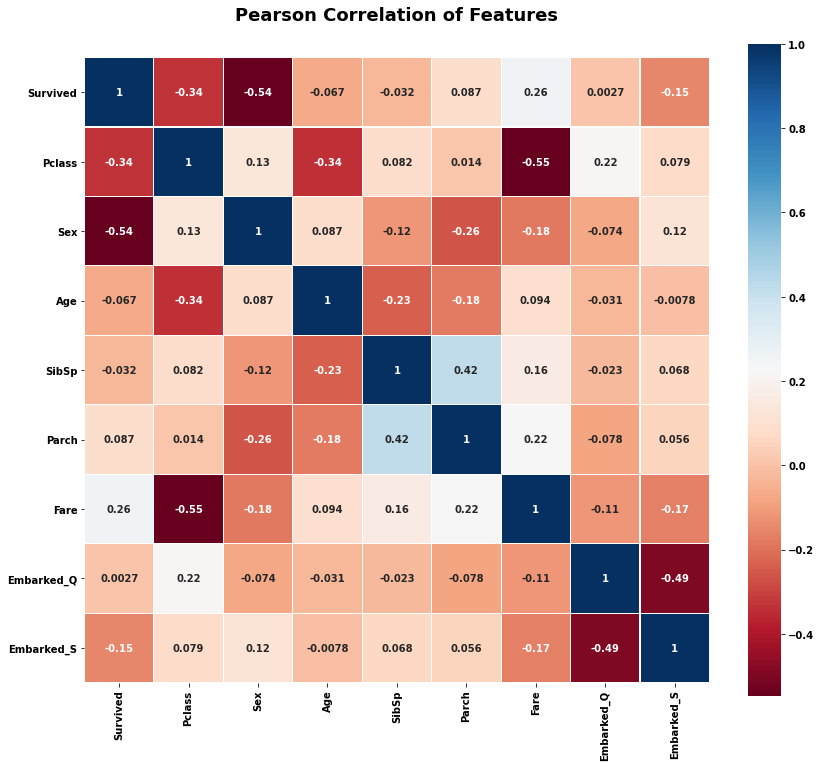

In [49]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

c:\programdata\miniconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


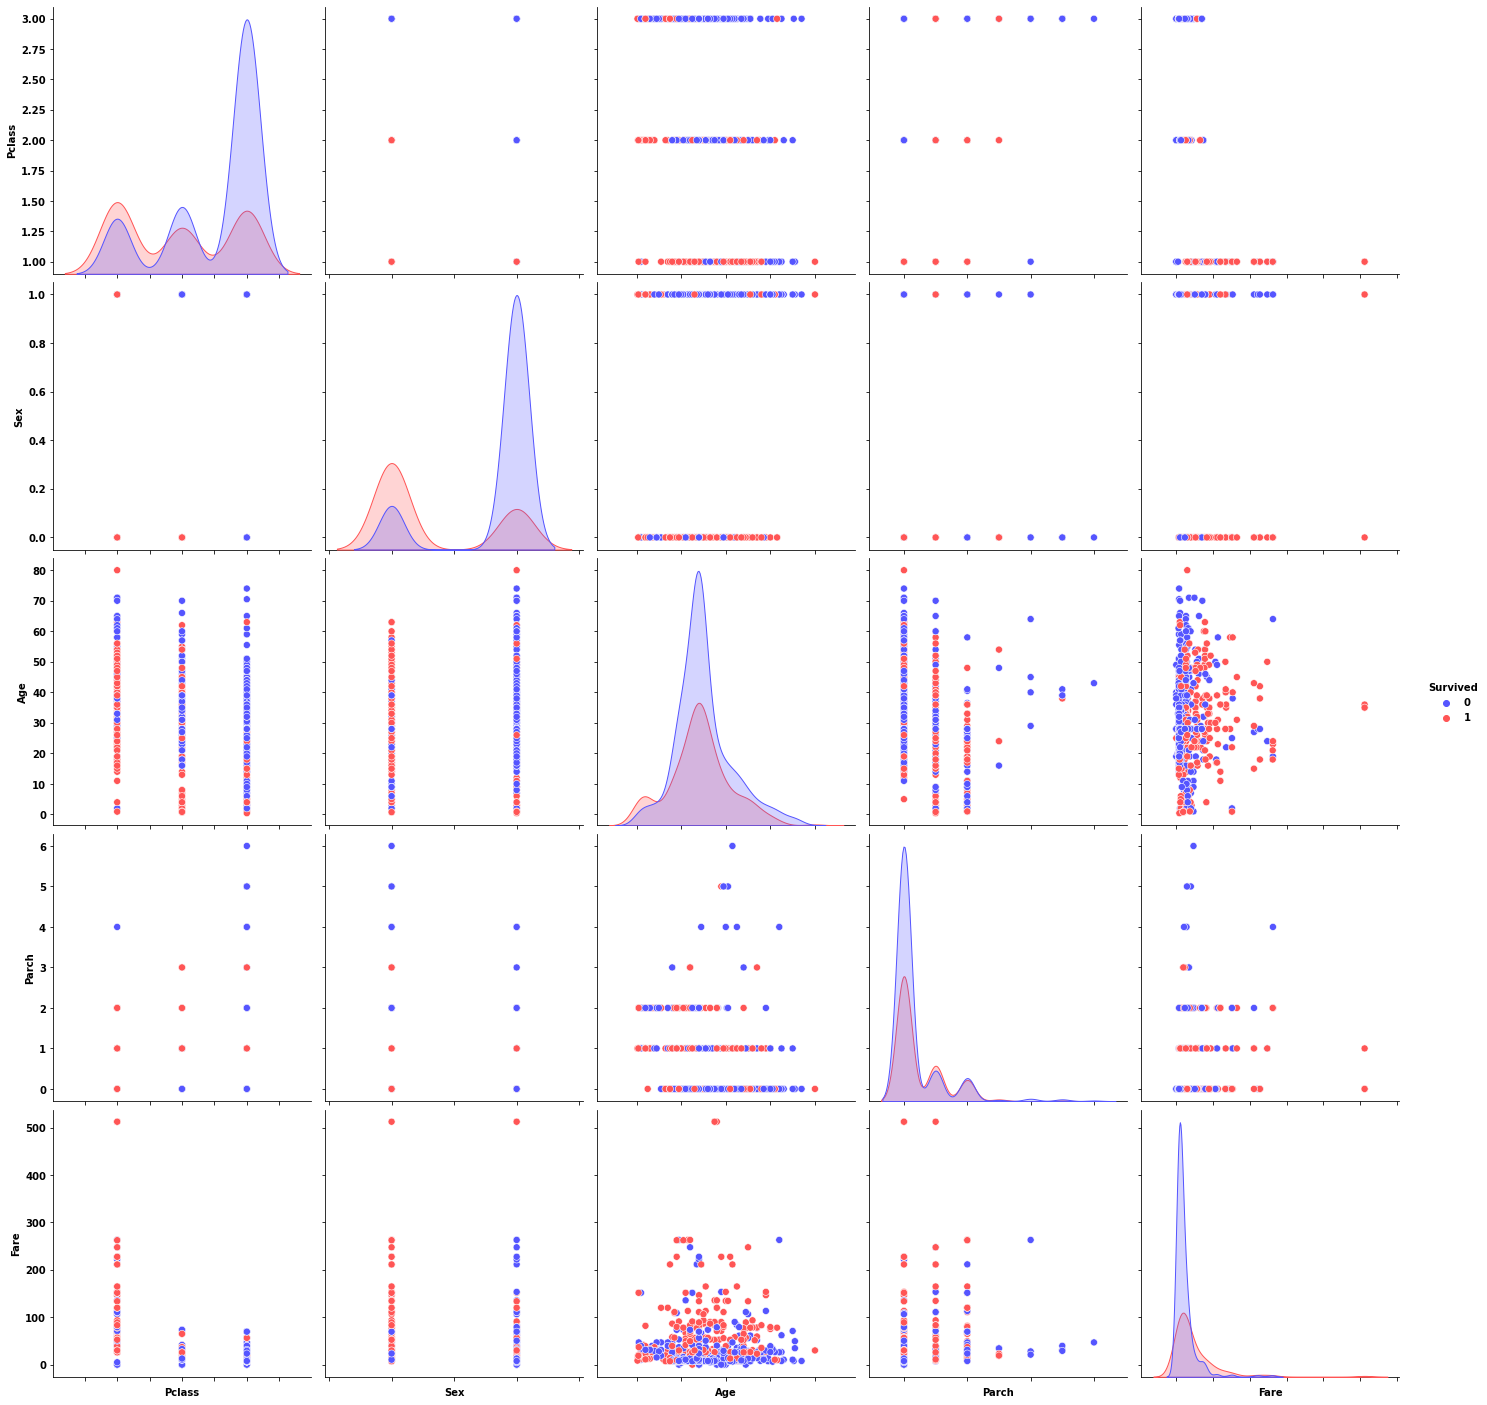

In [50]:
g = sns.pairplot(Data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [51]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [52]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [ ]:
#your code here

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [ ]:
#Your code here

**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

In [ ]:
#your code here

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 14*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
#your code here

**Задание 15.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

# Бонус.

**Задание 16*.** Мы провели довольно подробный однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет. 

a) Попробуйте написать свою модель для предсказания выживаемости, используя обнаруженные закономерности. 

b) Оцените качество модели - вычислите долю правильных ответов алгоритма по всем данным.

In [85]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,AgeBin,AgeBin_Code
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]",1
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,0,0,"(32.0, 48.0]",2
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,"(16.0, 32.0]",1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,0,1,"(32.0, 48.0]",2
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]",2


In [75]:
def prediction(x):
    if x['Sex'] == 1:
        return 0
    return 1

In [76]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)

0.7873303167420814

**Задание 17.***

1) Разбейте данные на тренировочную и тестовую часть с помощью train_test_split.

2) Обучите KNN на тренировочной части, сделайте предсказание на тесте и вычислите долю правильных ответов.

3) С помощью написанной вами раннее модели сделайте предсказание на тесте и оцените его качества.

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

y = Data['Survived']
X = Data._get_numeric_data().drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [87]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,AgeBin_Code
165,3,1,9.0,0,2,20.525,0,1,0
199,2,0,24.0,0,0,13.000,0,1,1
300,3,0,28.0,0,0,7.750,1,0,1
241,3,0,28.0,1,0,15.500,1,0,1
106,3,0,21.0,0,0,7.650,0,1,1


In [98]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

In [99]:
accuracy_score(y_test, pred)

0.6787330316742082

In [91]:
pred_test = X_test.apply(lambda x: prediction(x), axis=1)

accuracy_score(y_test, pred_test)

0.7782805429864253